In [1]:
import keras
print(keras.__version__)
import keras_genomics
print(keras_genomics.__version__)

/Users/avantishrikumar/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.
2.1.6
2.0.0


In [2]:

kernel_size=11
filters=20
input_length=200

model = keras.models.Sequential()
model.add(keras_genomics.layers.RevCompConv1D(
            filters=filters, kernel_size=kernel_size,
            input_shape=(input_length,4), activation="relu"))
model.add(keras_genomics.layers.normalization.RevCompConv1DBatchNorm())
model.add(keras_genomics.layers.RevCompConv1D(
            filters=filters, kernel_size=kernel_size,
            activation="relu"))
model.add(keras_genomics.layers.normalization.RevCompConv1DBatchNorm())
model.add(keras.layers.pooling.MaxPooling1D(pool_size=20,stride=20))
model.add(keras_genomics.layers.core.DenseAfterRevcompConv1D(
            units=10, activation="relu"))
model.add(keras_genomics.layers.core.Dense(
            units=1))



Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
/Users/avantishrikumar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(strides=20, pool_size=20)`


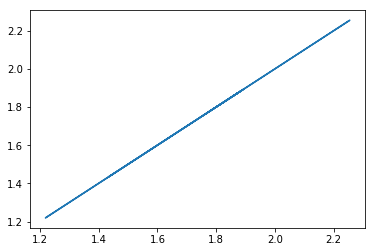

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

random_input = np.random.random((10, input_length, 4))
plt.plot(model.predict(random_input), model.predict(random_input[:,::-1,::-1]))
plt.show()
assert np.max(np.abs(model.predict(random_input)
        - model.predict(random_input[:,::-1,::-1]))) < 1e-5